<a href="https://colab.research.google.com/github/Hiji1023/kaggle_curriculum/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **프로세스**


**1.   데이터셋 확인**

**2.   EDA**

**3.   feature engineering**

**4.   model 만들기**

**5.   모델 학습 및 예측**

**6.   모델 평가**









In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# 결측치 시각화 제공
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<ipython-input-1-46e9f3c8e0f1>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. 데이터셋 확인**

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 각 feature가 가진 통계치 반환
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## **1.1 Null data check**

In [6]:
for col in df_train.columns:
   msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
   print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
   msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
   print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%




*   Age,Cabin,Embarked(train에서만) null data존재함을 볼 수 있다.
*   msno라이브러리 사용해 더 쉽게 볼 수 있다



<Axes: >

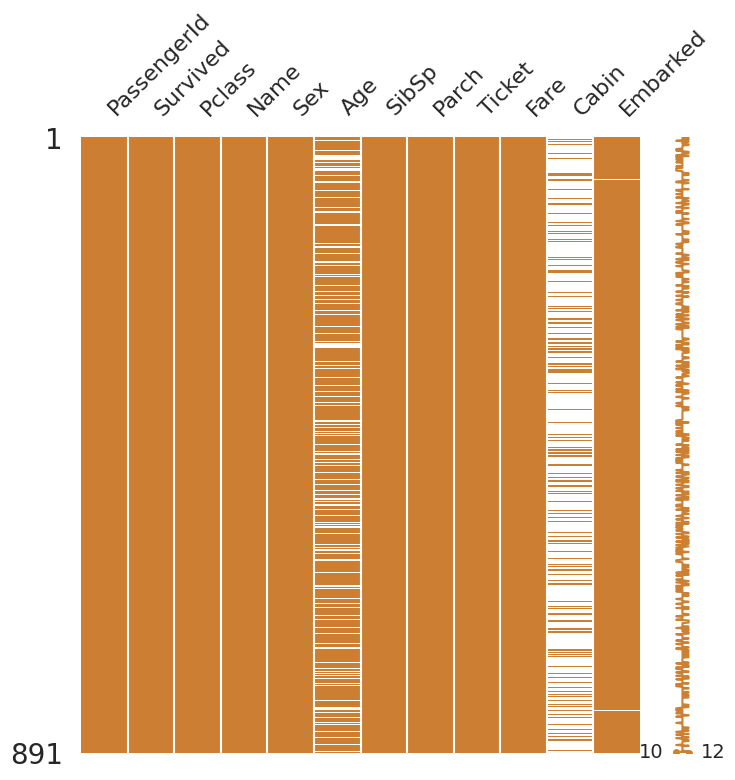

In [8]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8),color=(0.8,0.5,0.2))

<Axes: >

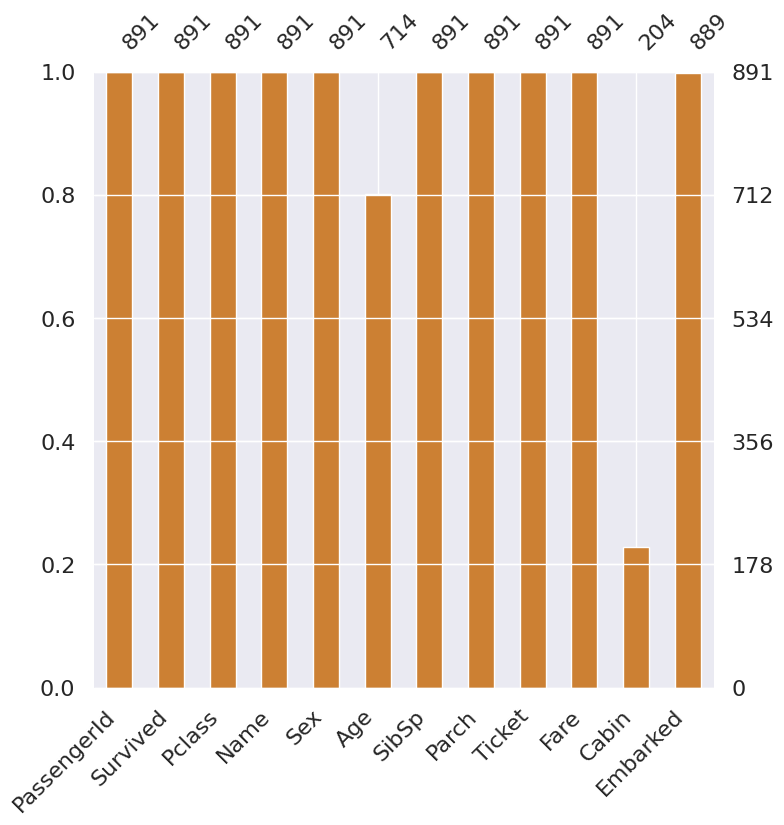

In [9]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8),color=(0.8,0.5,0.2))

<Axes: >

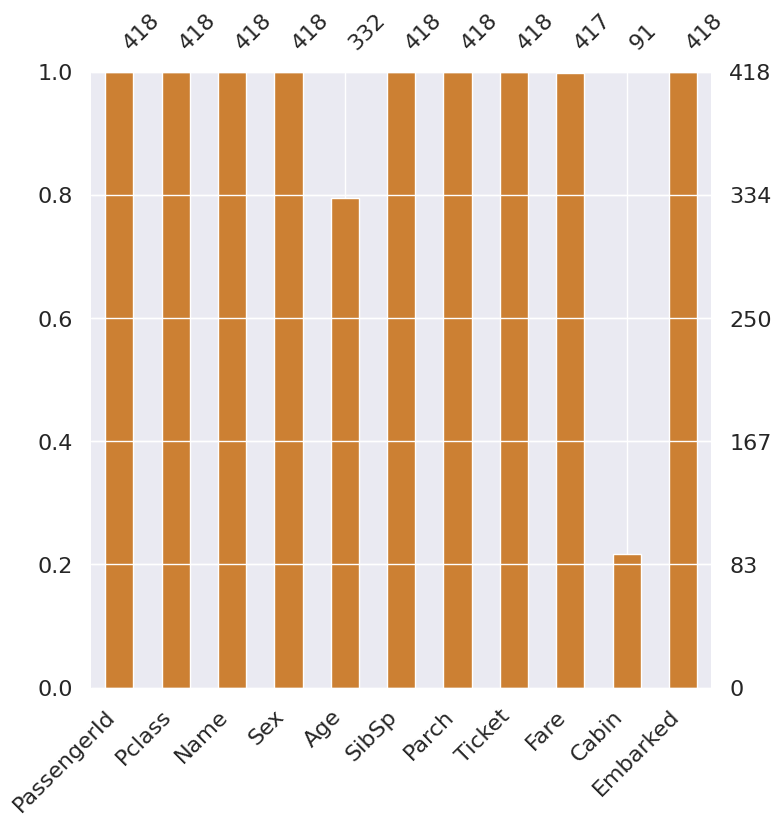

In [10]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8),color=(0.8,0.5,0.2))

## **1.2 Target label 확인**


*   **어떤 distribution가지고 있는지 확인**
*   **지금 같은 binary classification 문제의 경우 1과 0의 분포가 어떠냐에 따라 모델의 평가방법이 달라질 수 있다.**



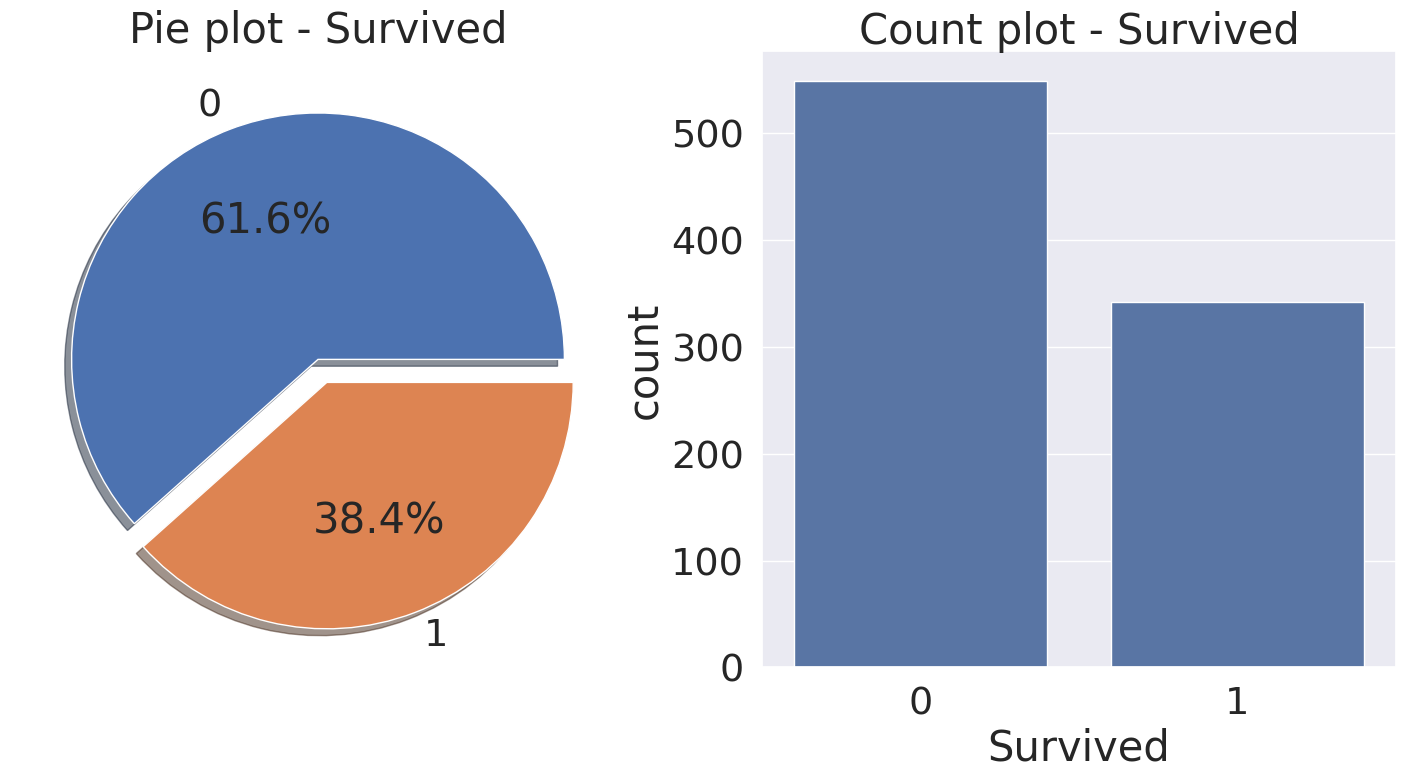

In [11]:
f, ax = plt.subplots(1, 2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# **2. EDA**

## **2.1 Pclass**


*   **Pclass는 ordinal, 서수형 데이터, 카데코리이면서 순서가 있는 데이터 타입**
*   **Pclass에 따른 생존률 차이 살펴보기**
*   **Pclass, Suvived를 가져와 pclass로 묶음 -> count 된 것을 평균내면 pclass별 생존률 나옴**
*   **각 class에 몇 명이 있는지 확인가능, 생존한 사람의 총합 구하기**
  

  




In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
# pandas crosstab사용

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

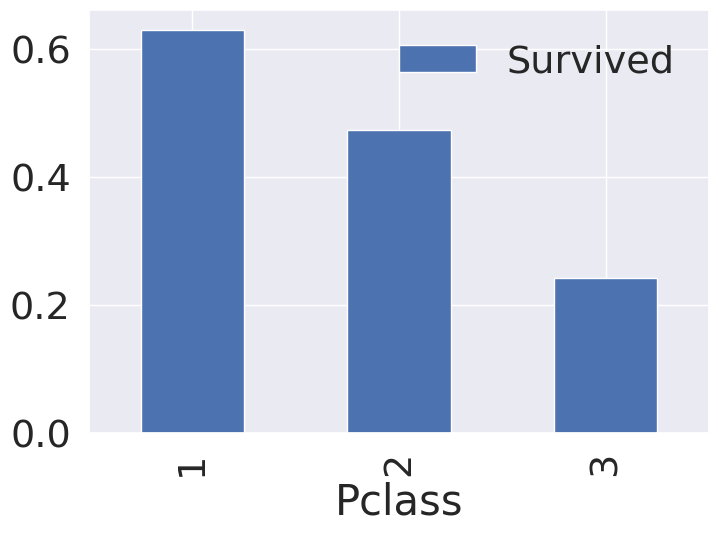

In [15]:
# Pclass가 높을수록 생존률 높음

df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

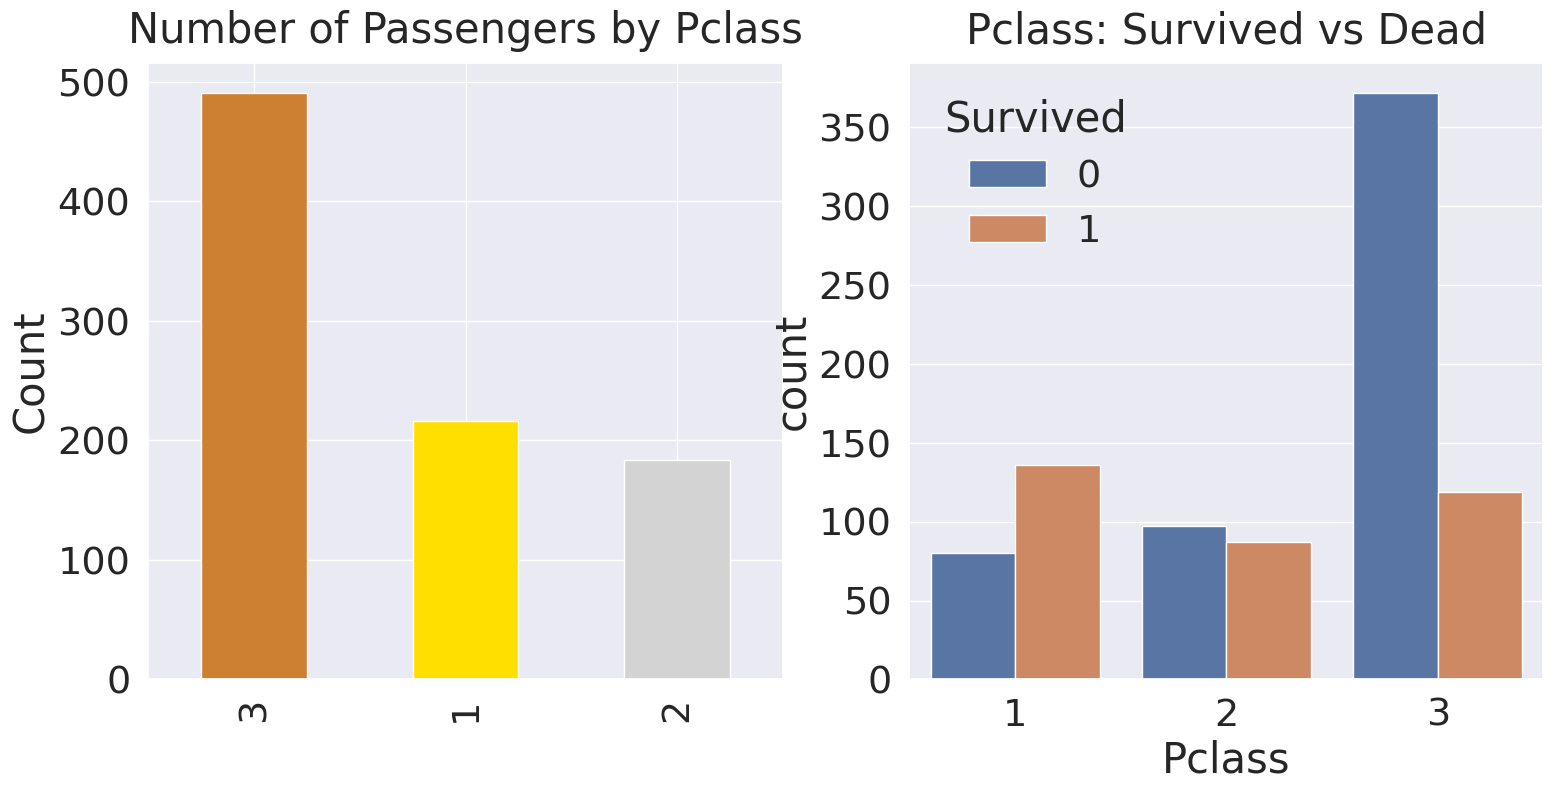

In [22]:
# seaborn의 countplot 을 이용해 특정 label에 따른 갯수 확인

y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(data = df_train,x = 'Pclass', hue = 'Survived',ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


> 클래스가 높을수록 생존확률이 높은 것을 확인, 순서대로 63%,48%,25%

> 생존에 Pclass가 큰 영향을 미친다 생각










## **2.2 Sex**



*   성별에 따라 생존률이 어떻게 달라지는지
*   pandas groupby, seaborn count plot 사용해 시각화



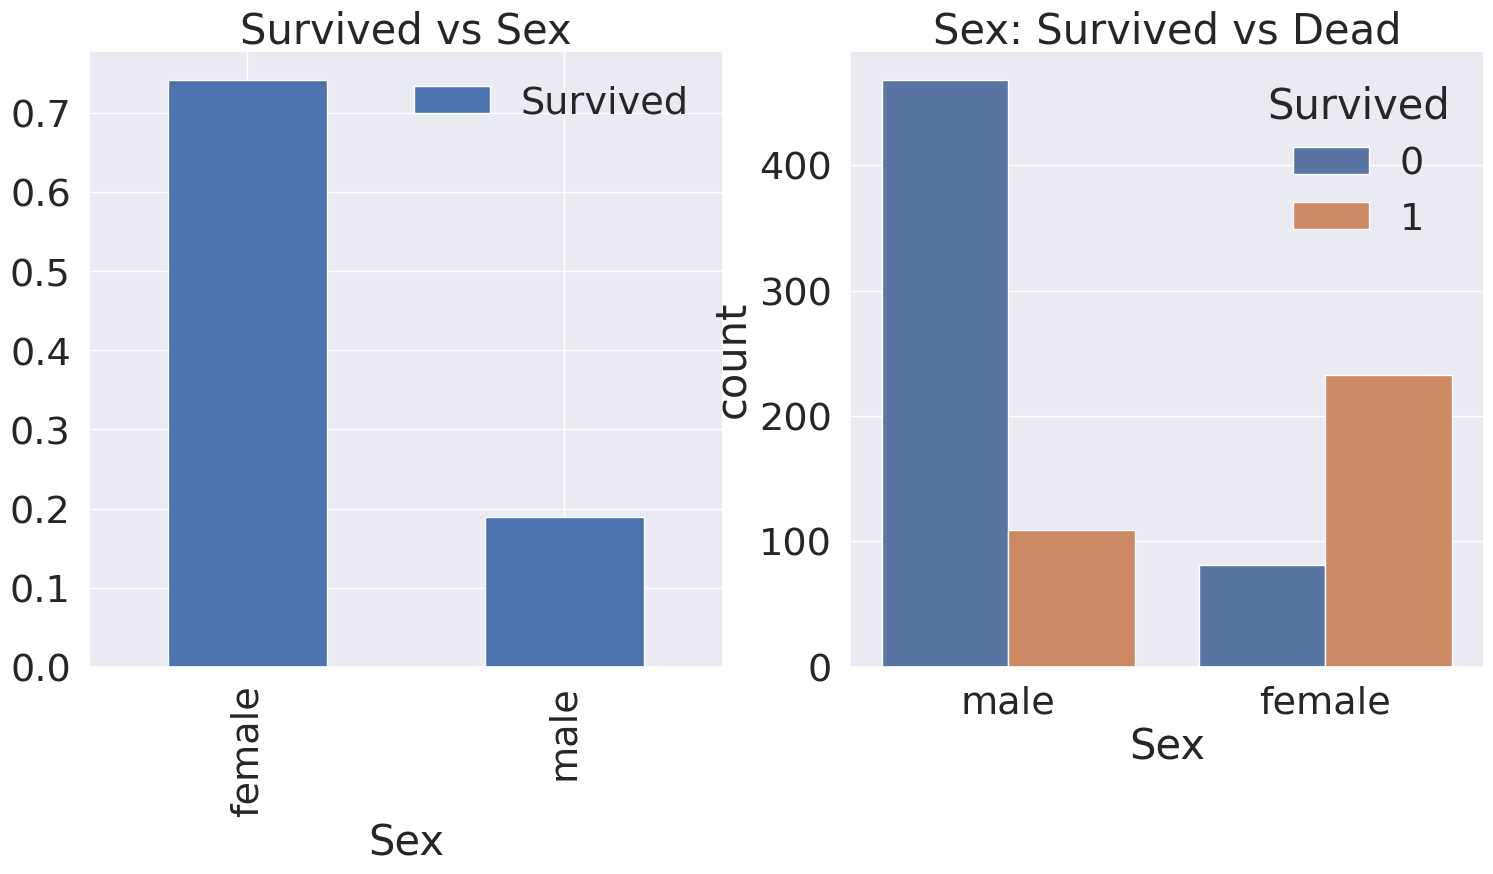

In [19]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data = df_train, x = 'Sex', hue = 'Survived', ax =ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()


In [27]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## **2.3 Both Sex and Pclass**



*   두가지에 관해 생존이 어떻게 달라지는지

*   seaborn의 factorplot을 이용하면 손쉽게 3개의 차원으로 이뤄진 그래프를 그릴 수 있다.






<Axes: xlabel='Pclass', ylabel='Survived'>

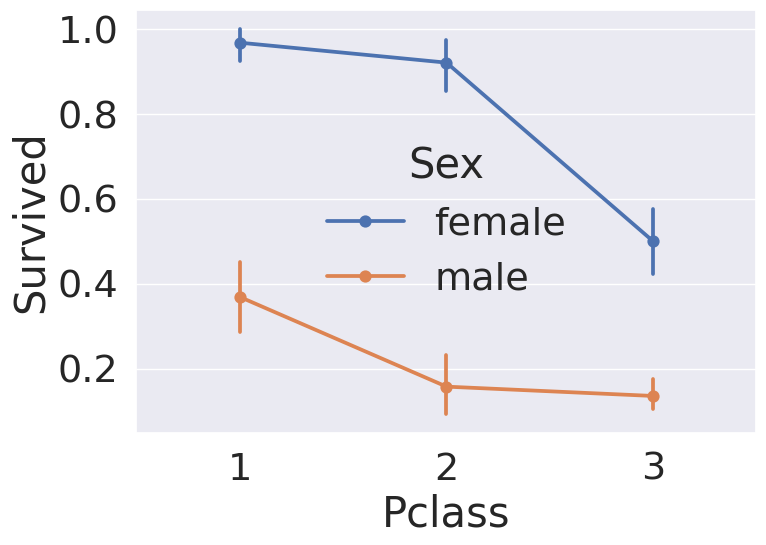

In [42]:
sns.pointplot(data = df_train, x='Pclass', y='Survived', hue = 'Sex', )




*   모든 클래스에서 female이 살 확률이 male보다 높다
*   또한 성별 상관없이 클래스가 높을수록 살 확률 높다

*   




## **2.4 Age**

In [66]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


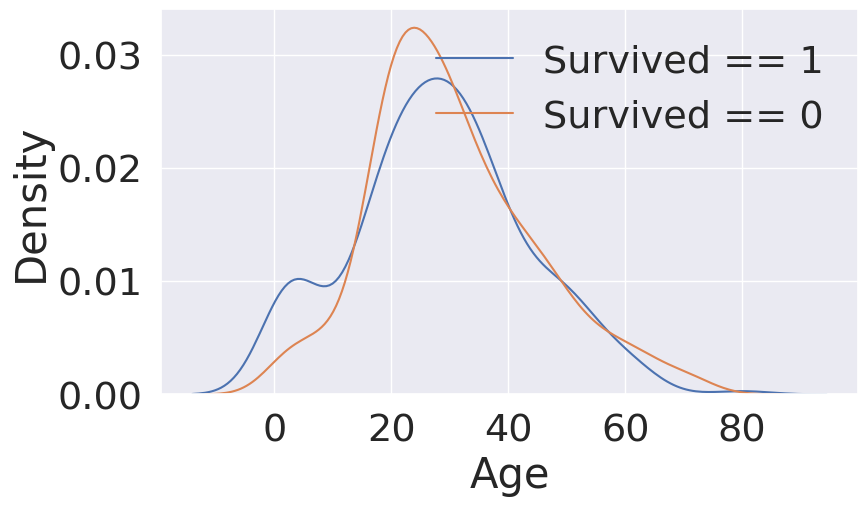

In [69]:
# 생존에 따른 histogram

f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

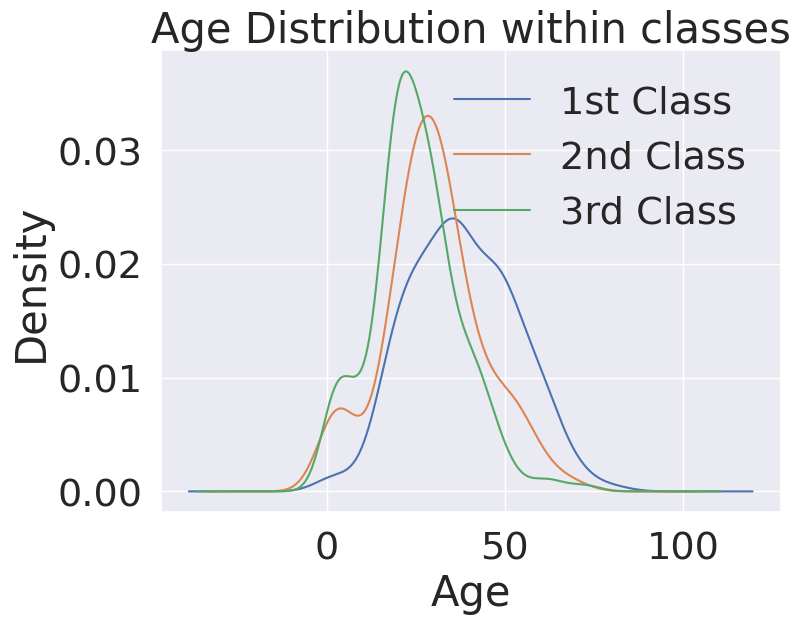

In [72]:
# Age distribution with Pclass

plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])



*   Class가 높을수록 나이많은 사람들의 비중이 큼
*   나이대가 변하면서 생존률이 어떻게 되는지
*   나이범위를 넓혀가며 확인



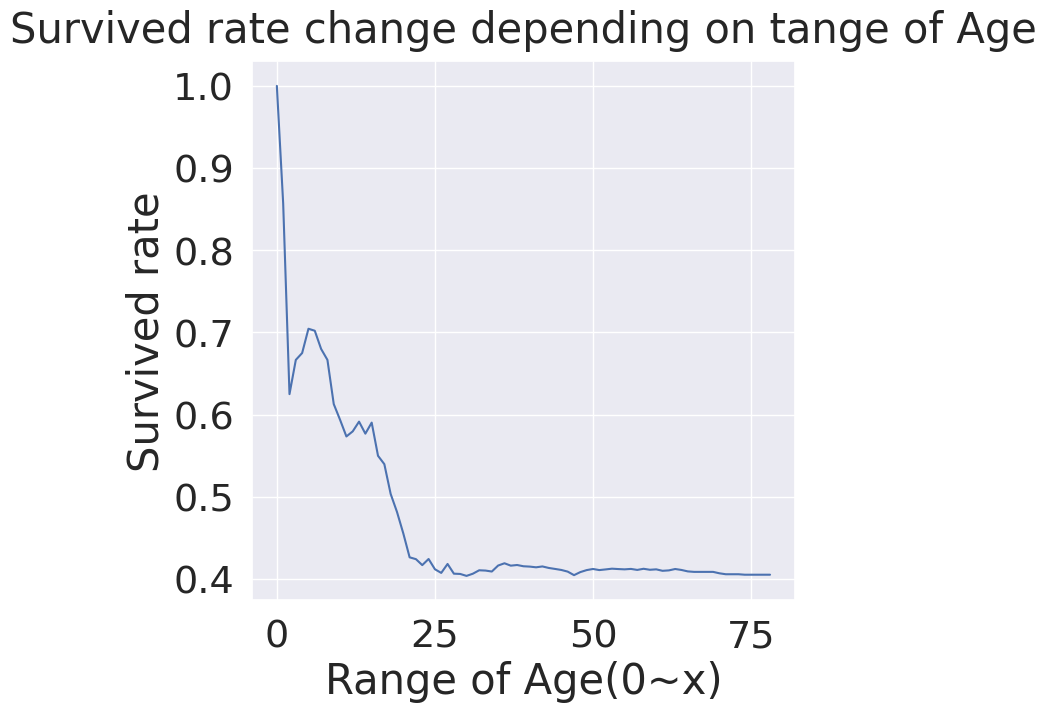

In [73]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survived rate change depending on tange of Age', y=1.02)
plt.ylabel('Survived rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## **2.5 Pclass, Sex, Age**




*   violinplot을 이용해 Pclass, Sex, Age, Survived에 대해 그리기
*   x축은 보고싶어하는 case(Pclass, Sex, Age), y축은 보고싶어하는 distribution(Age)





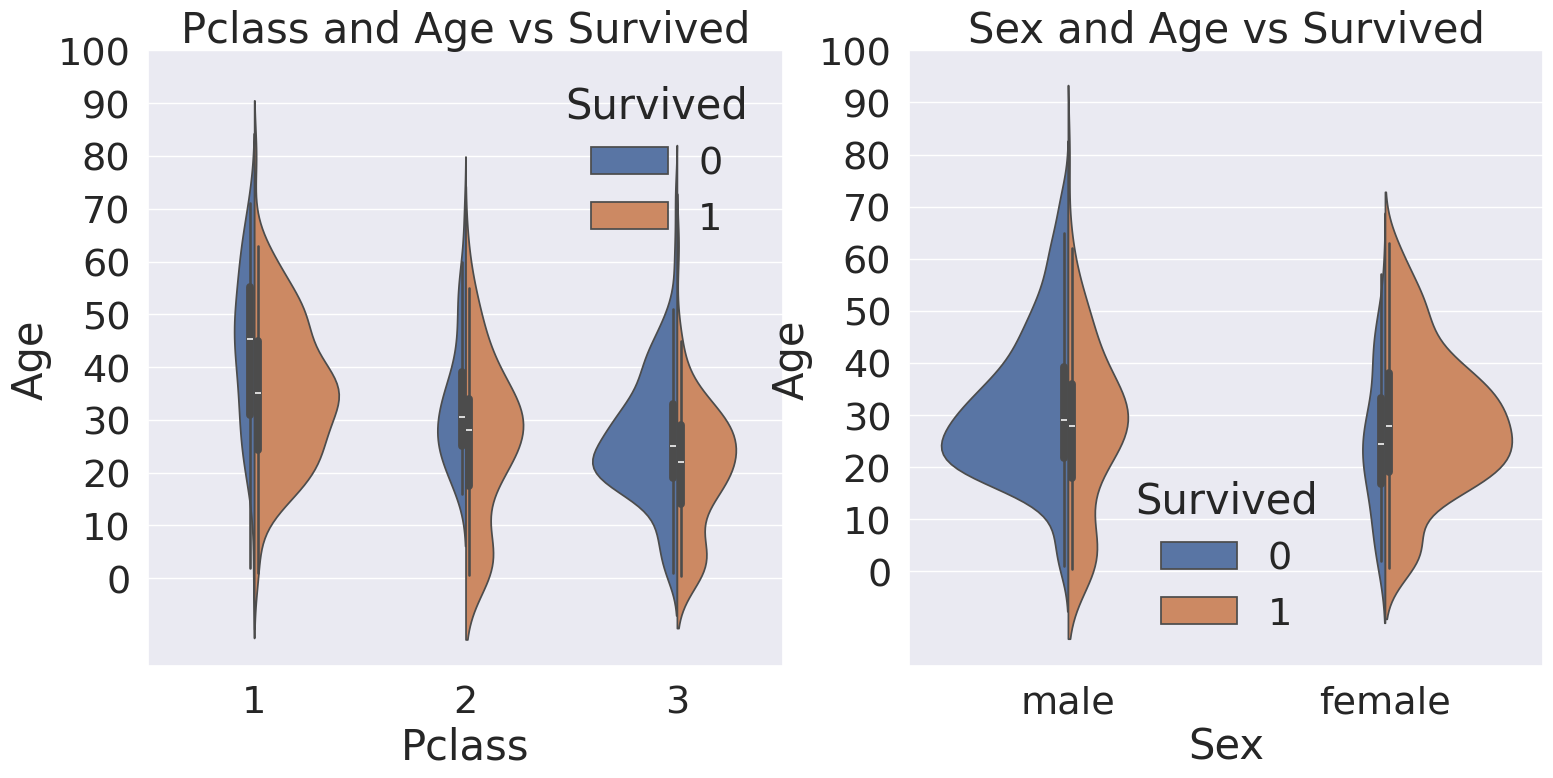

In [83]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data = df_train, x= "Pclass", y="Age", hue = "Survived", scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()



*   생존만 봤을때 모든 클래스에서 나이가 어릴수록 생존을 많이 함
*   오른쪽 그림을 보면, 여자가 더 많이 생존한 것을 볼 수 있음

*   여성과 아이를 먼저 챙긴 것을 볼 수 있음






## **2.6 Embarked**


*   Embarked 는 탑승한 항구를 나타냄
*   탑승한 곳에 따라 생존률보기



<Axes: xlabel='Embarked'>

<Figure size 700x700 with 0 Axes>

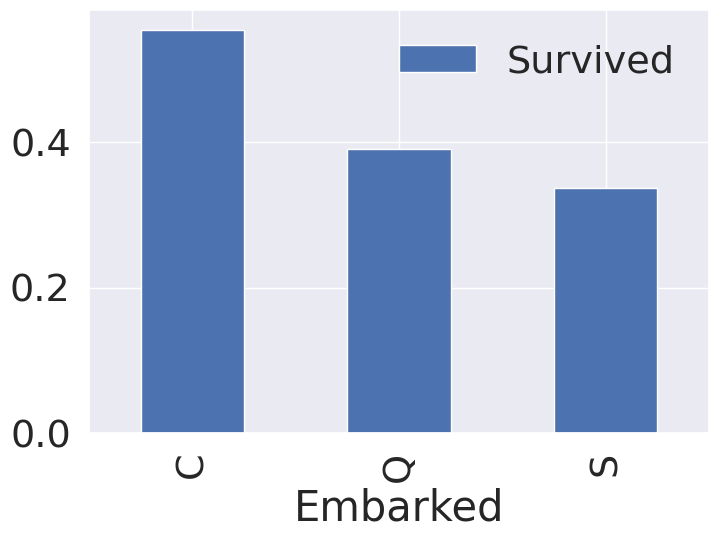

In [86]:
plt.figure(figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

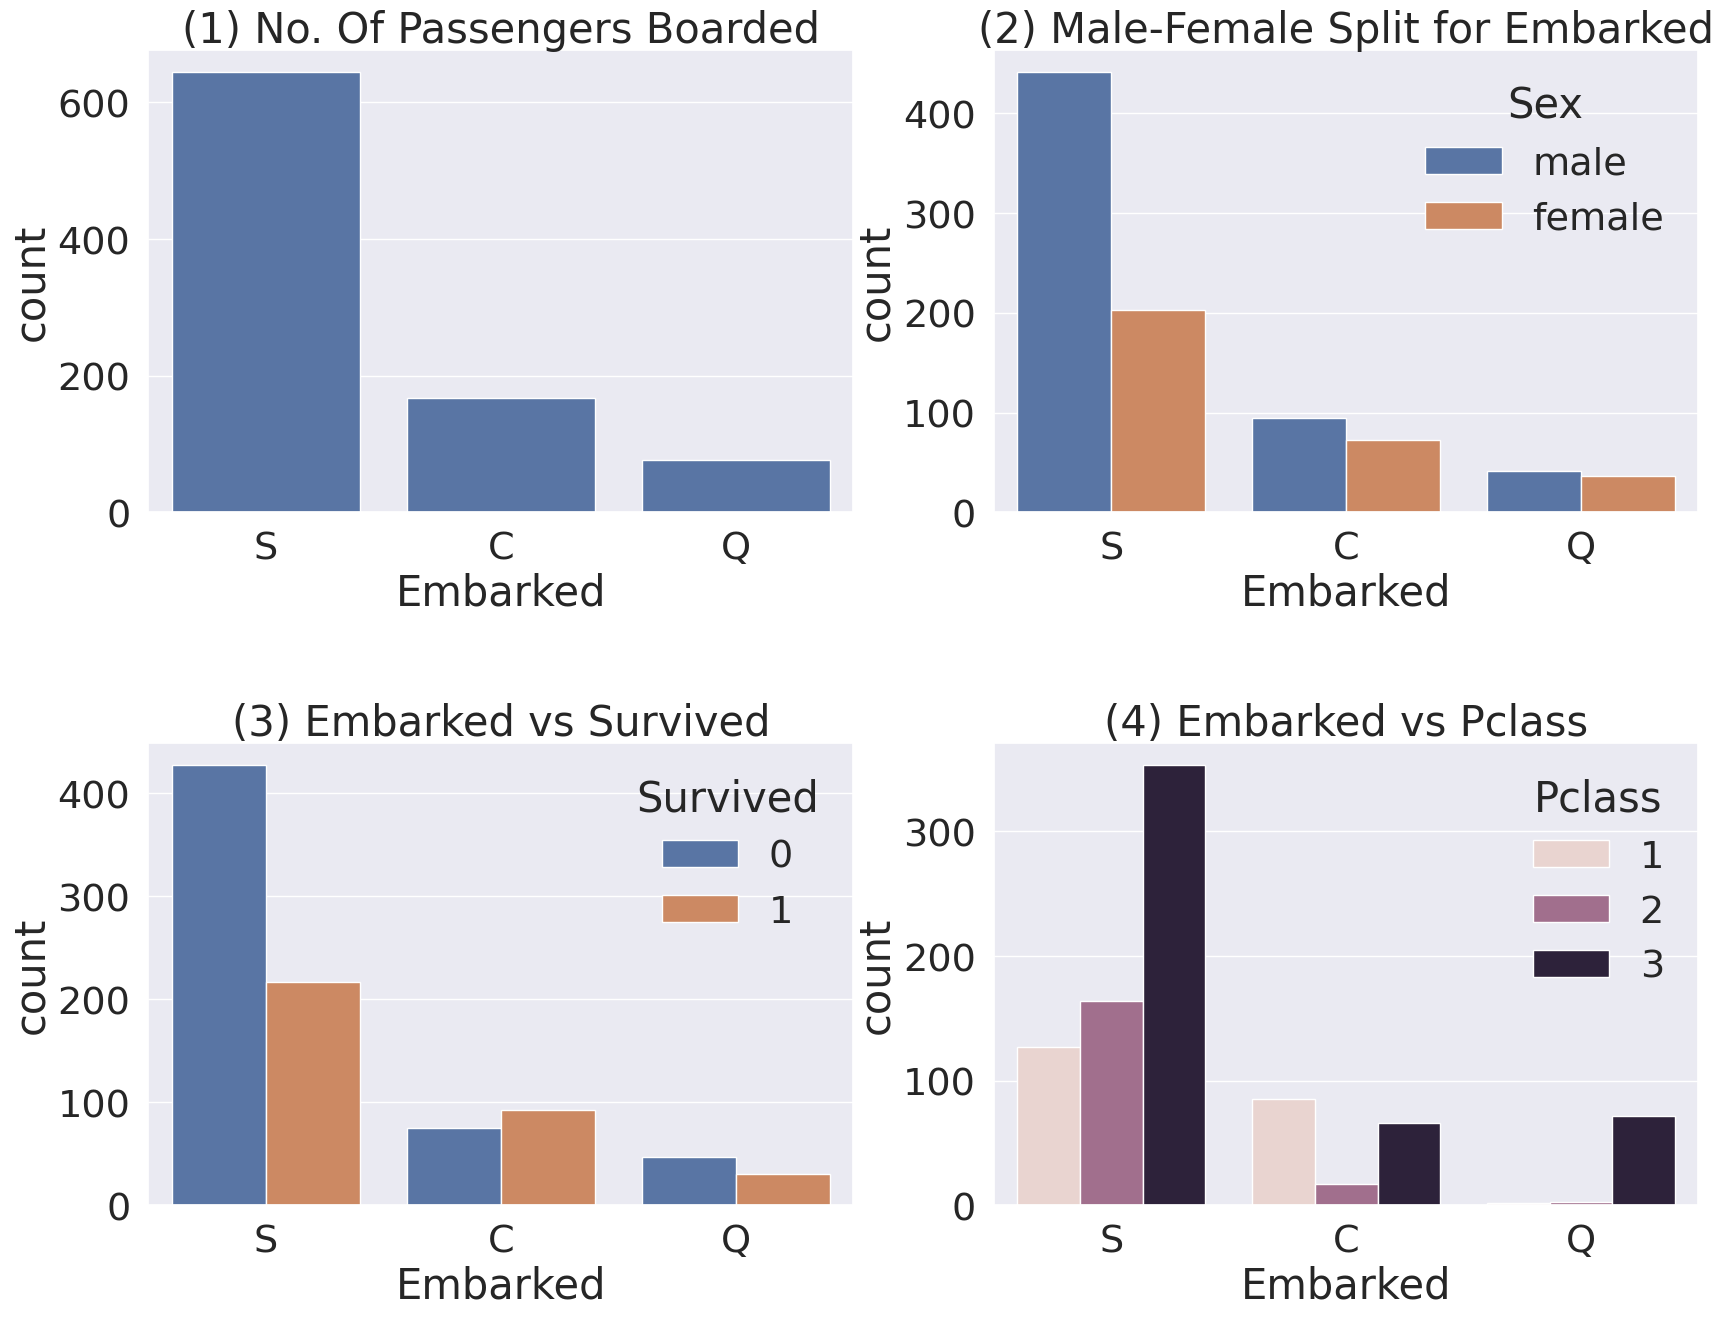

In [90]:
f, ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot(data=df_train, x = 'Embarked', ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# **2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)**



*   SibSp와 Parch를 합하면 Family가 될 것



In [92]:
# 자신을 포함해야하니 1을 더함
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


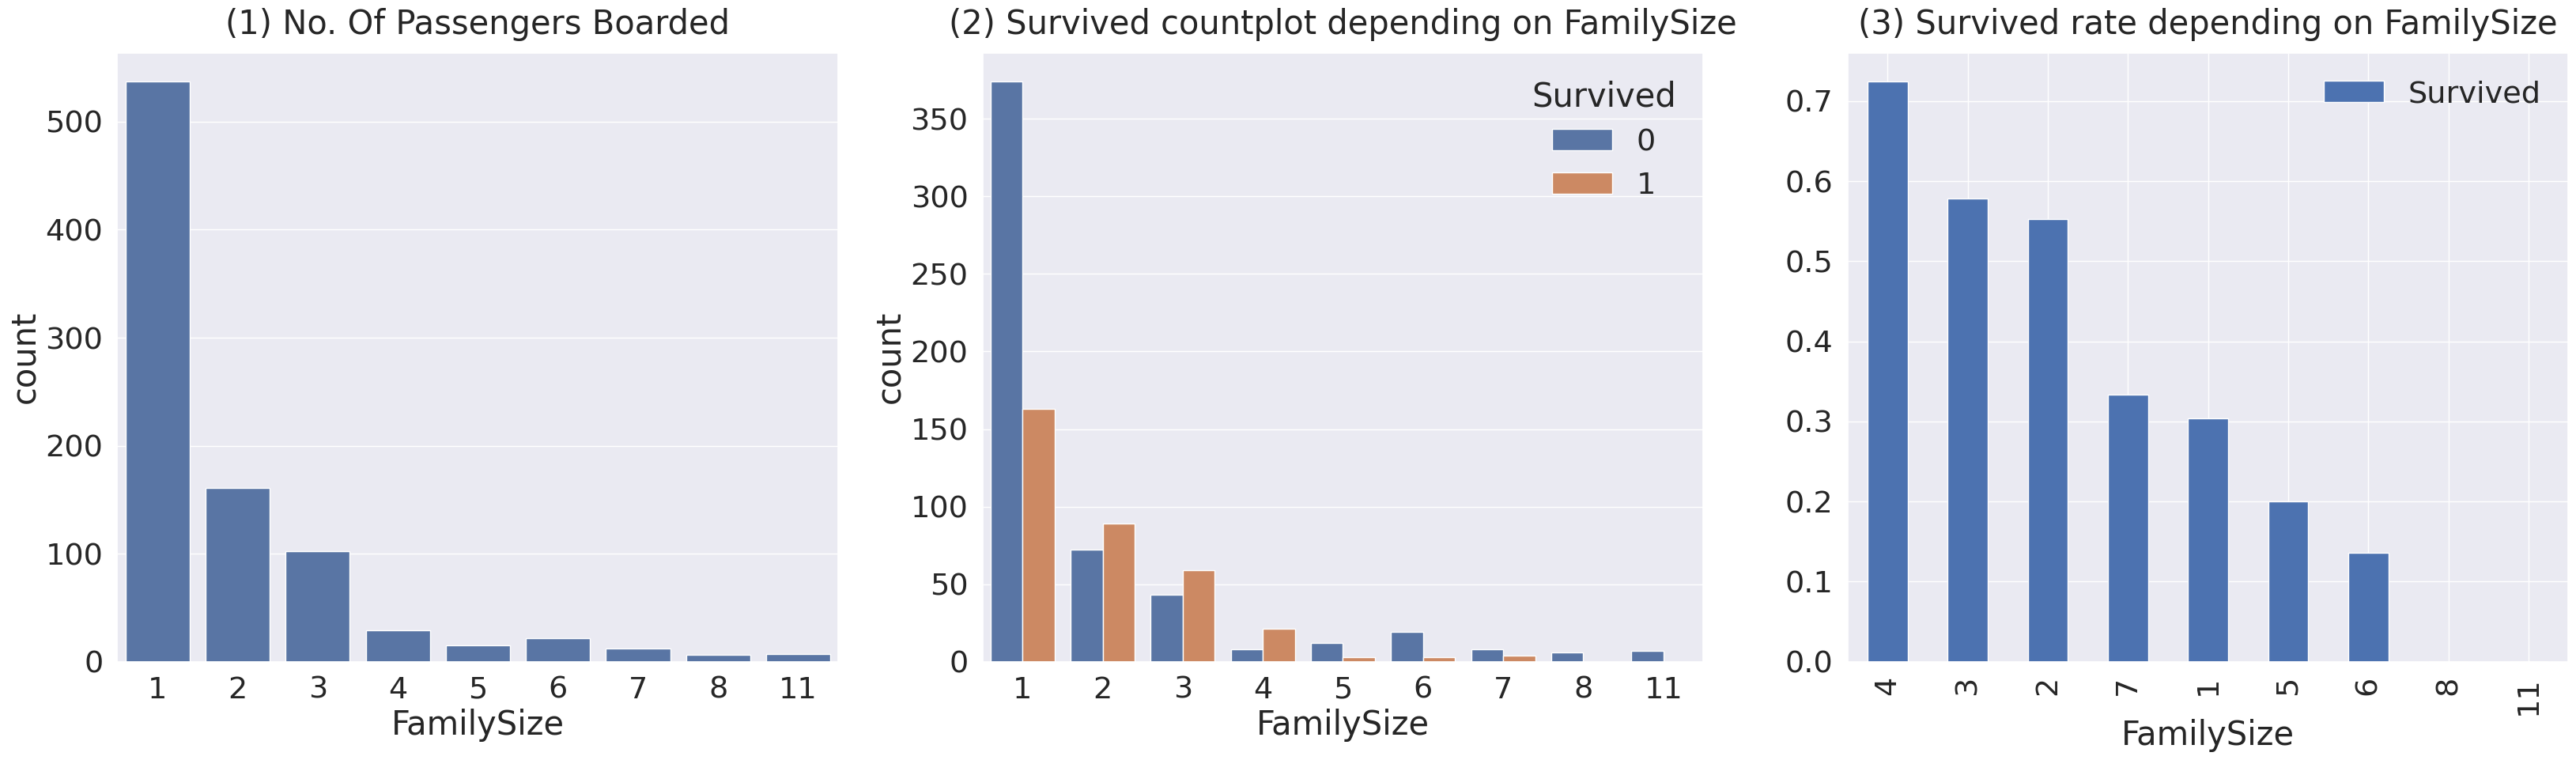

In [99]:
# FamilySize 와 Survived의 관계
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot(data = df_train, x = 'FamilySize', ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(data=df_train, x='FamilySize', hue = 'Survived',ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



*   f(2),(3) - 가족크기에 따른 생존비교
*   4명인 경우 생존확률이 가장 높음
*   가족수가 너무 커도, 너무 작아도 생존확률이 작음
*   3~4명 선에서 생존확룰이 높음







## **2.8 Fare**



*   Fare는 탑승요금, continuous feature -> histogram


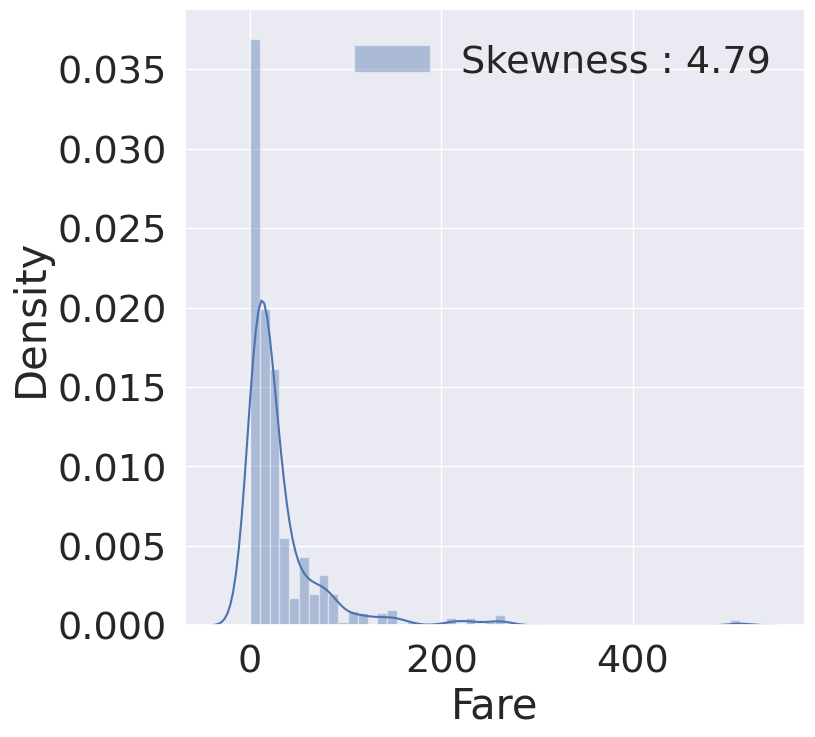

In [101]:
plt.figure(figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()))
g= g.legend(loc='best')



*   보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.

*   outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다
*   여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.


*   우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!



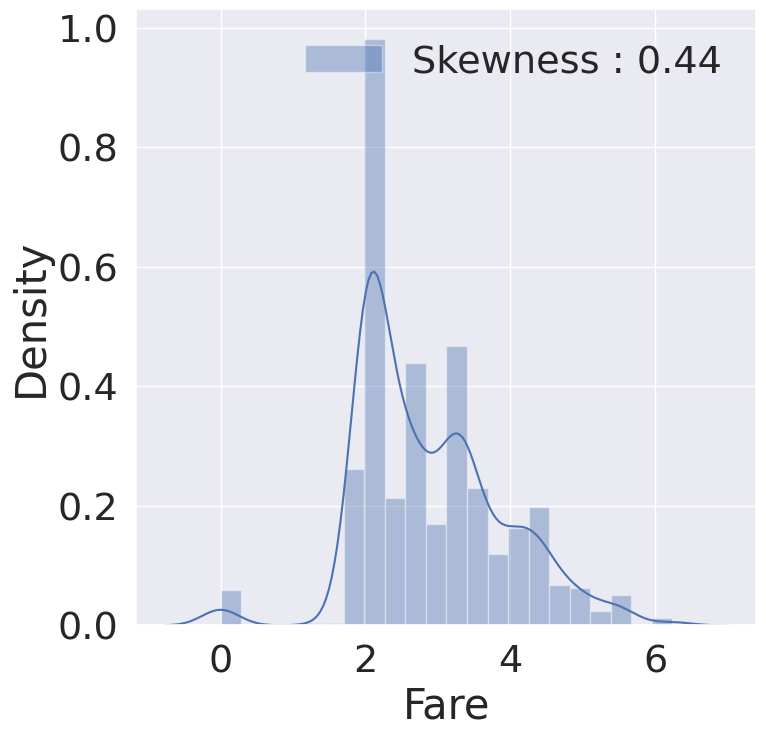

In [105]:
plt.figure(figsize=(8,8))

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()))
g= g.legend(loc='best')






*   log를 취하니 비대칭성이 많이 사라짐




## **2.9 Cabin**

*   이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.




In [103]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## **2.10 Ticket**



*   이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.




In [104]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64